# Main for StockRow screener
This notebook contains code to 
1. Pull financial data from an external source 
2. Lightly clean the data
3. Perform introductory financial analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

In [2]:
stock_list = pd.read_csv('list_of_stocks.csv')
stock_list.head(2)

Ticker            Name                  Sector Asset Class  \
0   AAPL       APPLE INC  Information Technology      Equity   
1   MSFT  MICROSOFT CORP  Information Technology      Equity   

       Market Value  Weight (%)    Notional Value         Shares      CUSIP  \
0  1,875,566,056.60        4.85  1,875,566,056.60  14,040,770.00   37833100   
1  1,709,995,853.92        4.42  1,709,995,853.92   6,717,457.00  594918104   

           ISIN    SEDOL   Price       Location Exchange Currency  FX Rate  \
0  US0378331005  2046251  133.58  United States   NASDAQ      USD        1   
1  US5949181045  2588173  254.56  United States   NASDAQ      USD        1   

  Market Currency Accrual Date  
0             USD           --  
1             USD           --

In [3]:
# this function pulls Income Statement data from StockRow.com
    # based on the user's choice of ticker
# and outputs a DataFrame of the Income Statement

##### btw PLEASE visit stockrow.com #####
##### they made a wonderful resource ####

## also the 'meat' of this code comes from:
## https://www.kite.com/python/answers/how-to-download-a-csv-file-from-a-url-in-python

def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [4]:
# this function pulls Balance Sheet data from StockRow.com

def balance_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'
    response = requests.get(url)
    with open(os.path.join("BalanceSheet", f"{ticker}_balance.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./BalanceSheet/{ticker}_balance.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [5]:
# this function pulls Cash Flow statement data from StockRow.com

def cashflow_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Cash%20Flow&sort=desc'
    response = requests.get(url)
    with open(os.path.join("CashFlow", f"{ticker}_cashflow.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./CashFlow/{ticker}_cashflow.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [6]:
# this function prompts the user for a ticker input
# and calls the income_puller() function to return a DataFrame
# same for balance_puller() to return Balance Sheet info
def ticker_input():
    ticker = input('Please enter a ticker').upper()
    income_df = income_puller(ticker.upper())
    balance_df = balance_puller(ticker.upper())
    cashflow_df = cashflow_puller(ticker.upper())
    return income_df, balance_df, cashflow_df, ticker

In [7]:
# call the function and print charts
income_df,balance_df, cashflow_df, ticker = ticker_input()
ticker.upper()

Please enter a ticker SWKS


'SWKS'

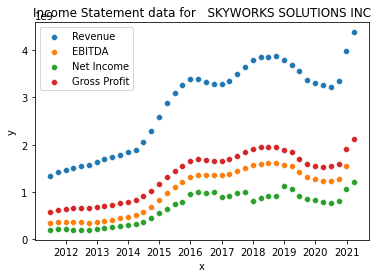

In [8]:
# plot the charts I like most
sns.scatterplot(data=income_df,x=income_df.index,y='Revenue')
sns.scatterplot(data=income_df,x=income_df.index,y='EBITDA')
sns.scatterplot(data=income_df,x=income_df.index,y='Net Income Common')
sns.scatterplot(data=income_df,x=income_df.index,y='Gross Profit').set(xlabel='x',ylabel='y')
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

# this code is optional, it may bounce errors
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Income Statement data for {ticker_name[5:]}');

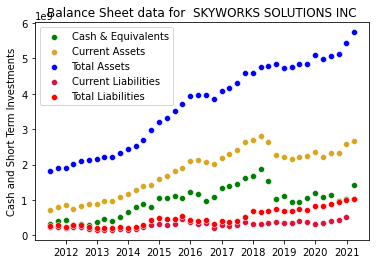

In [9]:
sns.scatterplot(data=balance_df,x=balance_df.index,y="Cash and Short Term Investments", color='green')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current assets", color='goldenrod')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total Assets", color='blue')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current liabilities", color='crimson')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total liabilities",color='red')
plt.legend(labels=['Cash & Equivalents','Current Assets','Total Assets','Current Liabilities','Total Liabilities']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Balance Sheet data for {ticker_name[6:]}');

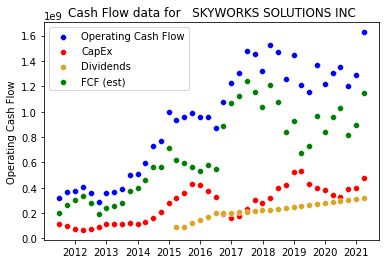

In [10]:
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y="Operating Cash Flow", color='blue')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Capital expenditures"], color='red')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Dividends Paid (Total)"], color='goldenrod')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=cashflow_df["Operating Cash Flow"]+cashflow_df["Capital expenditures"], color='green')
plt.legend(labels=['Operating Cash Flow','CapEx','Dividends','FCF (est)']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Cash Flow data for {ticker_name[5:]}');

### Creating code to pull each financial statement into a DataFrame
Each company should have three .xlsx files that were downloaded with the code above:
- Income Statement
- Balance Sheet
- Cash Flow Statement

Now I want to pull these financial tables into DataFrames

In [11]:
# I dropped some rows that give errors
drop_index_list = [7,84,309,486,340,636,754,1063,1352,1436,1481,1739,1756,1792,2044,2349,2793,2847,2947,2984,2995,3017,3026,3027,
                  3241,3352,3449,3450,3498,3499,3520,3560,3581,
                  3131,3326,3360,3361,3402,3431,3440,3468,3493,3496,3502,3537,3555,3608,3609,3611]

ticker_list = stock_list.drop(index=drop_index_list)['Ticker']

In [12]:
stock_list[stock_list['Ticker'] == 'ISSC'].index[0]

2947

#### Creating dictionaries to call DataFrames

In [13]:
# this code creates empty dictionaries
# then loops to create DataFrames based on tickers and .xlsx files already downloaded
inc_dict = {}
bal_dict = {}
cfl_dict = {}
start_time = time.time()

# income statement loop
for ticker in ticker_list:
    try:
        inc_dict[ticker] = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    except:
        print(f'{ticker} is a bad Income Statement ticker')

# balance sheet loop
for ticker in ticker_list:
    try:
        bal_dict[ticker] = pd.read_excel(f'./BalanceSheet/{ticker}_bal.xlsx').T
    except:
        print(f'{ticker} is a bad Balance Sheet ticker')

# cash flow statement list
for ticker in ticker_list:
    try:
        cfl_dict[ticker] = pd.read_excel(f'./CashFlow/{ticker}_cashflow.xlsx').T
    except:
        print(f'{ticker} is a bad Cash Flow ticker')

print(f'This code took {round(time.time() - start_time)} seconds to run')

This code took 203.19944024085999 seconds to run


In [14]:
bal_dict['AAPL'].head()

0            1          2   \
Unnamed: 0           Cash and Short Term Investments  Receivables  Inventory   
2021-03-31 00:00:00                       6.9834e+10   3.3036e+10  4.943e+09   
2020-12-31 00:00:00                       7.6826e+10    5.862e+10  4.023e+09   
2020-09-30 00:00:00                       9.0979e+10   3.7445e+10  3.924e+09   
2020-06-30 00:00:00                       9.3054e+10   3.2075e+10  3.289e+09   

                                       3                     4   \
Unnamed: 0           Other current assets  Total current assets   
2021-03-31 00:00:00            1.3376e+10           1.21465e+11   
2020-12-31 00:00:00            1.3687e+10           1.54106e+11   
2020-09-30 00:00:00            1.1228e+10           1.43713e+11   
2020-06-30 00:00:00            1.0958e+10           1.40065e+11   

                                                  5                      6   \
Unnamed: 0           Property, Plant, Equpment (Net)  Long-Term Investments   
2021-03-31 00:00:00                       3.7815e+10            1.34539e+11   
2020-12-31 00:00:00                       3.7933e+10            1.20454e+11   
2020-09-30 00:00:00                       4.5336e+10            1.02624e+11   
2020-06-30 00:00:00                       4.3851e+10            1.02219e+11   

                                                         7   \
Unnamed: 0           Goodwill and Intangible Assets (Total)   
2021-03-31 00:00:00                                     NaN   
2020-12-31 00:00:00                                     NaN   
2020-09-30 00:00:00                                     NaN   
2020-06-30 00:00:00                                     NaN   

                                           8                         9   ...  \
Unnamed: 0           Long-term assets (Other)  Total non-current assets  ...   
2021-03-31 00:00:00                4.3339e+10               2.15693e+11  ...   
2020-12-31 00:00:00                4.1561e+10               1.99948e+11  ...   
2020-09-30 00:00:00                3.2215e+10               1.80175e+11  ...   
2020-06-30 00:00:00                3.1209e+10               1.77279e+11  ...   

                                    22                  23                 24  \
Unnamed: 0           Total liabilities  Common Stock (Net)  Retained Earnings   
2021-03-31 00:00:00         2.6798e+11          5.4203e+10         1.5261e+10   
2020-12-31 00:00:00         2.8783e+11          5.1744e+10         1.4301e+10   
2020-09-30 00:00:00        2.58549e+11          5.0779e+10         1.4966e+10   
2020-06-30 00:00:00        2.45062e+11          4.8696e+10         2.4136e+10   

                                        25                           26  \
Unnamed: 0           Common Equity (Total)  Shareholders Equity (Total)   
2021-03-31 00:00:00             6.9178e+10                   6.9178e+10   
2020-12-31 00:00:00             6.6224e+10                   6.6224e+10   
2020-09-30 00:00:00             6.5339e+10                   6.5339e+10   
2020-06-30 00:00:00             7.2282e+10                   7.2282e+10   

                                                              27  \
Unnamed: 0           Shareholders Equity and Liabilities (Total)   
2021-03-31 00:00:00                                  3.37158e+11   
2020-12-31 00:00:00                                  3.54054e+11   
2020-09-30 00:00:00                                  3.23888e+11   
2020-06-30 00:00:00                                  3.17344e+11   

                                  28                              29  \
Unnamed: 0           Shares (Common)  Shareholders Equity (Tangible)   
2021-03-31 00:00:00      1.66863e+10                      6.9178e+10   
2020-12-31 00:00:00      1.68233e+10                      6.6224e+10   
2020-09-30 00:00:00      1.69768e+10                      6.5339e+10   
2020-06-30 00:00:00      1.71358e+10                      7.2282e+10   

                             30           31  
Unna

#### This bit of code sets the columns for each DataFrame inside its respective dictionary

Specifically, the raw data is offset by one row, such that the 'columns' are a numbered range and the true variable names are in row 1. This code sets the columns to be the first row, then deletes the first row

In [15]:
start_time = time.time()
bad_df_header_list = []
# income statement dataframes
for ticker in ticker_list:
    try:
        inc_dict[f"{ticker}"].columns = inc_dict[f"{ticker}"].iloc[0]
        inc_dict[f"{ticker}"] = inc_dict[f"{ticker}"].iloc[1:]
    except:
        print(f'{ticker} income statement did not work')
        bad_df_header_list.append(ticker)

# balance sheet dataframes
for ticker in ticker_list:
    try:
        bal_dict[f"{ticker}"].columns = bal_dict[f"{ticker}"].iloc[0]
        bal_dict[f"{ticker}"] = bal_dict[f"{ticker}"].iloc[1:]
    except:
        print(f'{ticker} balance sheet did not work')

# cash flow statement dataframes
for ticker in ticker_list:
    try:
        cfl_dict[f"{ticker}"].columns = cfl_dict[f"{ticker}"].iloc[0]
        cfl_dict[f"{ticker}"] = cfl_dict[f"{ticker}"].iloc[1:]
    except:
        print(f'{ticker} cash flow statement did not work')
        
print(f"This code took {round(time.time() - start_time)} seconds to run")

QS income statement did not work
MRVI income statement did not work
PLTK income statement did not work
SHC income statement did not work
DNMR income statement did not work
UPST income statement did not work
MCFE income statement did not work
AI income statement did not work
PUBM income statement did not work
SEER income statement did not work
HYFM income statement did not work
FDMT income statement did not work
BCAB income statement did not work
MAX income statement did not work
SANA income statement did not work
RSI income statement did not work
GATO income statement did not work
CGEM income statement did not work
KRON income statement did not work
KNTE income statement did not work
ROOT income statement did not work
PMVP income statement did not work
GMTX income statement did not work
BOLT income statement did not work
OLMA income statement did not work
SBTX income statement did not work
MRVI cash flow statement did not work
PLTK cash flow statement did not work
UPST cash flow statem

In [16]:
#dropping some more bad tickers, as determined by the code above
another_drop_list = []
for ticker in bad_df_header_list:
    another_drop_list.append(ticker_list[ticker_list == ticker].index[0])

ticker_list.drop(index=another_drop_list,inplace=True)

In [17]:
print(f"There are now {len(ticker_list)} tickers")

There are now 3539 tickers


#### This piece of code determines which financial data is similar across companies
Should we use "EBIT" or "EBITDA" or "EBT" to compare metrics across companies? First let's determine, what are the most common metrics among DataFrames? We'll need a sort of logic table to help us count.

I'm using AAPL and MSFT as calibration since they are two very large market caps, and they should have similarly-named data. The *intersection* between AAPL columns and MSFT columns will be the column headers for my new DataFrame.

In [18]:
inc_dict['AAPL'].head()

Unnamed: 0               Revenue Cost of Revenue Gross Profit R&D Expenses  \
2021-03-31 00:00:00  3.25208e+11     1.98607e+11  1.26601e+11   2.0161e+10   
2020-12-31 00:00:00  2.93971e+11     1.80236e+11  1.13735e+11   1.9464e+10   
2020-09-30 00:00:00  2.74247e+11     1.69972e+11  1.04275e+11   1.8752e+10   
2020-06-30 00:00:00  2.73621e+11     1.69627e+11  1.03994e+11   1.7884e+10   
2020-03-31 00:00:00  2.68015e+11     1.65842e+11  1.02173e+11   1.7383e+10   

Unnamed: 0          SG&A Expenses Operating Income  \
2021-03-31 00:00:00    2.0712e+10       8.8903e+10   
2020-12-31 00:00:00     2.035e+10       7.4253e+10   
2020-09-30 00:00:00    1.9916e+10       6.6288e+10   
2020-06-30 00:00:00    1.9558e+10       6.7138e+10   
2020-03-31 00:00:00    1.9153e+10       6.5591e+10   

Unnamed: 0          Interest Expense (Operating) Non-operating Income/Expense  \
2021-03-31 00:00:00                    2.639e+09                        1e+07   
2020-12-31 00:00:00                    2.726e+09                    -7.46e+08   
2020-09-30 00:00:00                    2.873e+09                      1.8e+08   
2020-06-30 00:00:00                          NaN                     7.79e+08   
2020-03-31 00:00:00                          NaN                      9.1e+08   

Unnamed: 0          Non-operating Interest Expenses         EBT  ...  \
2021-03-31 00:00:00                       3.134e+09  8.9628e+10  ...   
2020-12-31 00:00:00                       3.465e+09  7.4752e+10  ...   
2020-09-30 00:00:00                       3.763e+09  6.7091e+10  ...   
2020-06-30 00:00:00                             NaN  6.8317e+10  ...   
2020-03-31 00:00:00                             NaN  6.7091e+10  ...   

Unnamed: 0          Free Cash Flow Margin      EBITDA        EBIT  \
2021-03-31 00:00:00                0.2782  9.6645e+10  8.8903e+10   
2020-12-31 00:00:00                0.2729  8.4827e+10  7.4253e+10   
2020-09-30 00:00:00                0.2675  7.6663e+10  6.6288e+10   
2020-06-30 00:00:00                0.2621  7.8085e+10  6.7138e+10   
2020-03-31 00:00:00                0.2486  7.7351e+10  6.5591e+10   

Unnamed: 0          EPS (Diluted, from Cont. Ops) EPS (Basic, Consolidated)  \
2021-03-31 00:00:00                        4.4649                    4.5129   
2020-12-31 00:00:00                        3.7076                    3.7474   
2020-09-30 00:00:00                        3.2753                    3.3085   
2020-06-30 00:00:00                        3.2976                    3.3262   
2020-03-31 00:00:00                        3.1973                    3.2233   

Unnamed: 0          EPS (Basic, from Continuous Ops)  \
2021-03-31 00:00:00                           4.5129   
2020-12-31 00:00:00                           3.7474   
2020-09-30 00:00:00                           3.3085   
2020-06-30 00:00:00                           3.3262   
2020-03-31 00:00:00                           3.2233   

Unnamed: 0          Income from Continuous Operations  \
2021-03-31 00:00:00                        7.6311e+10   
2020-12-31 00:00:00                         6.393e+10   
2020-09-30 00:00:00                        5.7411e+10   
2020-06-30 00:00:00                        5.8424e+10   
2020-03-31 00:00:00                        5.7215e+10   

Unnamed: 0          Consolidated Net Income/Loss EBITDA Margin  \
2021-03-31 00:00:00                   7.6311e+10        0.2972   
2020-12-31 00:00:00                    6.393e+10        0.2886   
2020-09-30 00:00:00                   5.7411e+10        0.2795   
2020-06-30 00:00:00                   5.8424e+10        0.2854   
2020-03-31 00:00:00                   5.7215e+10        0.2886   

Unnamed: 0          Operating Cash Flow Margin  
2021-03-31 00:00:00                     0.3062  
2020-12-31 00:00:00                     0.3025  
2020-09-30 00:00:00                     0.2942  
2020-06-30 00:00:00                     0.2924  
2020-03-31 00:00:00                     0.2812  

[5 rows x 28 columns]

##### Start with Income Statement

In [20]:
start_time = time.time()

AAPL_intersect_MSFT = set(inc_dict['AAPL'].columns).intersection(set(inc_dict['MSFT'].columns))

inc_df_list = pd.DataFrame(index=ticker_list, columns = list(AAPL_intersect_MSFT))


for i in inc_df_list.index:        # tickers
    for j in inc_df_list.columns:  # financial variables
        if j in inc_dict[i].columns:
            inc_df_list.loc[i,j] = True
        else:
            inc_df_list.loc[i,j] = False

print(f"This code took {round(time.time() - start_time)} seconds to run")
inc_df_list

This code took 13 seconds to run


Non-operating Income/Expense EBITDA Margin EPS (Basic, Consolidated)  \
Ticker                                                                        
AAPL                           True          True                      True   
MSFT                           True          True                      True   
AMZN                           True          True                      True   
FB                             True          True                      True   
GOOGL                          True          True                      True   
...                             ...           ...                       ...   
LIFE                           True          True                      True   
THMO                           True          True                      True   
HSTO                           True          True                      True   
VYNT                           True          True                      True   
PALI                           True          True                      True   

       Free Cash Flow Margin SG&A Expenses EPS (Basic, from Continuous Ops)  \
Ticker                                                                        
AAPL                    True          True                             True   
MSFT                    True          True                             True   
AMZN                    True          True                             True   
FB                      True          True                             True   
GOOGL                   True          True                             True   
...                      ...           ...                              ...   
LIFE                    True          True                             True   
THMO                    True          True                             True   
HSTO                    True          True                             True   
VYNT                    True          True                             True   
PALI                    True          True                             True   

       Income from Continuous Operations Revenue Income Tax Provision  \
Ticker                                                                  
AAPL                                True    True                 True   
MSFT                                True    True                 True   
AMZN                                True    True                 True   
FB                                  True    True                 True   
GOOGL                               True    True                 True   
...                                  ...     ...                  ...   
LIFE                                True    True                False   
THMO                                True    True                False   
HSTO                                True    True                False   
VYNT                                True    True                 True   
PALI                                True    True                False   

       Cost of Revenue  ... Operating Income Net Profit Margin  \
Ticker                  ...                                      
AAPL              True  ...             True              True   
MSFT              True  ...             True              True   
AMZN              True  ...             True              True   
FB                True  ...             True              True   
GOOGL             True  ...             True              True   
...                ...  ...              ...               ...   
LIFE             False  ...             True              True   
THMO              True  ...             True              True   
HSTO              True  ...             True              True   
VYNT              True  ...             True              True   
PALI             False  ...             True              True   

       Consolidated Net Income/Loss Income after Tax   EBT R&D Expenses  \
Ticker                                                             

In [21]:
inc_df_list.sum()

Non-operating Income/Expense         3277.0
EBITDA Margin                        3514.0
EPS (Basic, Consolidated)            3459.0
Free Cash Flow Margin                3533.0
SG&A Expenses                        3441.0
EPS (Basic, from Continuous Ops)     3459.0
Income from Continuous Operations    3468.0
Revenue                              3357.0
Income Tax Provision                 3096.0
Cost of Revenue                      3247.0
EPS (Diluted, from Cont. Ops)        3459.0
EBT margin                           3519.0
Non-operating Interest Expenses      2869.0
Net Income Common                    3517.0
Interest Expense (Operating)         2135.0
Operating Cash Flow Margin           3533.0
EBIT                                 3106.0
EPS (Basic)                          3505.0
Operating Income                     3465.0
Net Profit Margin                    3517.0
Consolidated Net Income/Loss         3517.0
Income after Tax                     3465.0
EBT                             

##### Same for Balance Sheet

In [22]:
start_time = time.time()
AAPL_intersect_MSFT = set(bal_dict['AAPL'].columns).intersection(set(bal_dict['MSFT'].columns))

bal_df_list = pd.DataFrame(index=ticker_list, columns = list(AAPL_intersect_MSFT))


for i in bal_df_list.index:        # tickers
    for j in bal_df_list.columns:  # financial variables
        if j in bal_dict[i].columns:
            bal_df_list.loc[i,j] = True
        else:
            bal_df_list.loc[i,j] = False

print(f"This code took {round(time.time() - start_time)} seconds to run")
bal_df_list

This code took 20 seconds to run


Other current liabilities Non-current Revenue (Deferred)  \
Ticker                                                            
AAPL                        True                           True   
MSFT                        True                           True   
AMZN                        True                           True   
FB                          True                          False   
GOOGL                       True                           True   
...                          ...                            ...   
LIFE                        True                           True   
THMO                        True                           True   
HSTO                        True                           True   
VYNT                        True                           True   
PALI                        True                          False   

       Current Revenue (Deferred) Long Term Debt (Total) Retained Earnings  \
Ticker                                                                       
AAPL                         True                   True              True   
MSFT                         True                   True              True   
AMZN                        False                   True              True   
FB                           True                   True              True   
GOOGL                        True                   True              True   
...                           ...                    ...               ...   
LIFE                         True                   True              True   
THMO                         True                   True              True   
HSTO                         True                   True              True   
VYNT                         True                   True              True   
PALI                         True                   True              True   

       Total liabilities Total Assets Net Debt Total Debt  \
Ticker                                                      
AAPL                True         True     True       True   
MSFT                True         True     True       True   
AMZN                True         True     True       True   
FB                  True         True     True       True   
GOOGL               True         True     True       True   
...                  ...          ...      ...        ...   
LIFE                True         True     True       True   
THMO                True         True     True       True   
HSTO                True         True     True       True   
VYNT                True         True     True       True   
PALI                True         True     True       True   

       Total non-current liabilities  ... Accounts Payable  \
Ticker                                ...                    
AAPL                            True  ...             True   
MSFT                            True  ...             True   
AMZN                            True  ...             True   
FB                              True  ...             True   
GOOGL                           True  ...             True   
...                              ...  ...              ...   
LIFE                            True  ...             True   
THMO                            True  ...             True   
HSTO                            True  ...             True   
VYNT                            True  ...             True   
PALI                            True  ...             True   

       Long Term Tax Liability (Deferred) Total non-current assets  \
Ticker                                                               
AAPL                                 True                     True   
MSFT                                 True                     True   
AMZN                                 True                     True   
FB                                   True                     True   
GOOGL                                True                     True   
...                          

In [23]:
bal_df_list.sum()

Other current liabilities                      2857.0
Non-current Revenue (Deferred)                 2005.0
Current Revenue (Deferred)                     1253.0
Long Term Debt (Total)                         3476.0
Retained Earnings                              3528.0
Total liabilities                              3534.0
Total Assets                                   3537.0
Net Debt                                       3534.0
Total Debt                                     3492.0
Total non-current liabilities                  3512.0
Shareholders Equity and Liabilities (Total)    3516.0
Total current assets                           3529.0
Shareholders Equity (Total)                    3534.0
Receivables                                    3034.0
Shareholders Equity (Tangible)                 3516.0
Cash and Short Term Investments                3530.0
Current Part of Debt                           3394.0
Non-current Liabilities (Other)                3504.0
Common Stock (Net)          

In [24]:
bal_dict['AAPL'].iloc[3]

Unnamed: 0
Cash and Short Term Investments                 9.3054e+10
Receivables                                     3.2075e+10
Inventory                                        3.289e+09
Other current assets                            1.0958e+10
Total current assets                           1.40065e+11
Property, Plant, Equpment (Net)                 4.3851e+10
Long-Term Investments                          1.02219e+11
Goodwill and Intangible Assets (Total)                 NaN
Long-term assets (Other)                        3.1209e+10
Total non-current assets                       1.77279e+11
Total Assets                                   3.17344e+11
Accounts Payable                                3.8058e+10
Accrued Expenses                                       NaN
Current Part of Debt                            2.0048e+10
Current Revenue (Deferred)                       6.313e+09
Other current liabilities                       3.9945e+10
Total current liabilities                    

##### Same for Cash Flow Statement

In [25]:
start_time = time.time()
AAPL_intersect_MSFT = set(cfl_dict['AAPL'].columns).intersection(set(cfl_dict['MSFT'].columns))

cfl_df_list = pd.DataFrame(index=ticker_list, columns = list(AAPL_intersect_MSFT))


for i in cfl_df_list.index:        # tickers
    for j in cfl_df_list.columns:  # financial variables
        if j in cfl_dict[i].columns:
            cfl_df_list.loc[i,j] = True
        else:
            cfl_df_list.loc[i,j] = False

print(f"This code took {round(time.time() - start_time)} seconds to run")
cfl_df_list

This code took 14 seconds to run


Investments Change (Net) Capital Stock Change Capital expenditures  \
Ticker                                                                      
AAPL                       True                 True                 True   
MSFT                       True                 True                 True   
AMZN                       True                 True                 True   
FB                         True                 True                 True   
GOOGL                      True                 True                 True   
...                         ...                  ...                  ...   
LIFE                       True                 True                 True   
THMO                      False                 True                 True   
HSTO                       True                 True                 True   
VYNT                       True                 True                 True   
PALI                       True                 True                 True   

       Assets Liabilities Change (Total) Change in Cash  \
Ticker                                                    
AAPL                                True           True   
MSFT                                True           True   
AMZN                                True           True   
FB                                  True           True   
GOOGL                               True           True   
...                                  ...            ...   
LIFE                                True           True   
THMO                                True           True   
HSTO                                True           True   
VYNT                                True           True   
PALI                                True           True   

       Equity Repurchase (Common, Net) Long-Term Investments Change (Net)  \
Ticker                                                                      
AAPL                              True                               True   
MSFT                              True                               True   
AMZN                              True                               True   
FB                                True                               True   
GOOGL                             True                               True   
...                                ...                                ...   
LIFE                              True                              False   
THMO                              True                              False   
HSTO                              True                              False   
VYNT                              True                              False   
PALI                              True                              False   

       Change in payables and accrued liability Depreciation & Amortization  \
Ticker                                                                        
AAPL                                       True                        True   
MSFT                                       True                        True   
AMZN                                       True                        True   
FB                                         True                        True   
GOOGL                                      True                        True   
...                                         ...                         ...   
LIFE                                       True                        True   
THMO                                       True                        True   
HSTO                                       True                        True   
VYNT                                       True                        True   
PALI                                       True                        True   

       Beginning Cash  ... Accounts Payable Change Financing cash flow  \
Ticker                 ...                                               
AAPL             True  ...                    True         

In [26]:
cfl_df_list.sum()

Investments Change (Net)                    2631.0
Capital Stock Change                        3368.0
Capital expenditures                        3411.0
Assets Liabilities Change (Total)           3491.0
Change in Cash                              3520.0
Equity Repurchase (Common, Net)             3363.0
Long-Term Investments Change (Net)          1938.0
Change in payables and accrued liability    3088.0
Depreciation & Amortization                 3479.0
Beginning Cash                              3485.0
Accounts Receivable Change                  3184.0
Other financial activities                  3473.0
Dividends Paid (Common)                     3525.0
Other investing activities                  2947.0
Ending Cash                                 3490.0
Issuance/Purchase of Shares                 3430.0
Net Aquisitions                             2459.0
Net Income                                  3537.0
Accounts Payable Change                     2205.0
Financing cash flow            

##### Columns to keep

In [27]:
inc_columns = ['Revenue','Gross Profit','Operating Income','Income Tax Provision', 'Net Income Common']
bal_columns = ['Total Assets','Total current assets','Total liabilities','Total current liabilities',
               'Shareholders Equity (Total)','Shares (Common)']
cfl_columns = ['Dividends Paid (Common)','Capital expenditures','Operating Cash Flow','Equity Repurchase (Common, Net)']

##### Applying the 'keep' columns to each DF inside the DF dictionaries
Using AAPL as an example

In [28]:
inc_dict['AAPL'][inc_columns].head(2)

Unnamed: 0               Revenue Gross Profit Operating Income  \
2021-03-31 00:00:00  3.25208e+11  1.26601e+11       8.8903e+10   
2020-12-31 00:00:00  2.93971e+11  1.13735e+11       7.4253e+10   

Unnamed: 0          Income Tax Provision Net Income Common  
2021-03-31 00:00:00           1.3317e+10        7.6311e+10  
2020-12-31 00:00:00           1.0822e+10         6.393e+10

In [29]:
bal_dict['AAPL'][bal_columns].head(2)

Unnamed: 0          Total Assets Total current assets Total liabilities  \
2021-03-31 00:00:00  3.37158e+11          1.21465e+11        2.6798e+11   
2020-12-31 00:00:00  3.54054e+11          1.54106e+11        2.8783e+11   

Unnamed: 0          Total current liabilities Shareholders Equity (Total)  \
2021-03-31 00:00:00               1.06385e+11                  6.9178e+10   
2020-12-31 00:00:00               1.32507e+11                  6.6224e+10   

Unnamed: 0          Shares (Common)  
2021-03-31 00:00:00     1.66863e+10  
2020-12-31 00:00:00     1.68233e+10

In [30]:
cfl_dict['AAPL'][cfl_columns].head(2)

Unnamed: 0          Dividends Paid (Common) Capital expenditures  \
2021-03-31 00:00:00             -1.4227e+10           -9.118e+09   
2020-12-31 00:00:00             -1.4155e+10           -8.702e+09   

Unnamed: 0          Operating Cash Flow Equity Repurchase (Common, Net)  
2021-03-31 00:00:00          9.9591e+10                      -7.539e+10  
2020-12-31 00:00:00          8.8921e+10                     -7.5549e+10

##### Combining the three separate DataFrames above into one large DataFrame

In [31]:
#still using AAPL as one example
pd.concat([inc_dict['AAPL'][inc_columns],bal_dict['AAPL'][bal_columns],cfl_dict['AAPL'][cfl_columns]], axis=1).head(2)

Unnamed: 0               Revenue Gross Profit Operating Income  \
2021-03-31 00:00:00  3.25208e+11  1.26601e+11       8.8903e+10   
2020-12-31 00:00:00  2.93971e+11  1.13735e+11       7.4253e+10   

Unnamed: 0          Income Tax Provision Net Income Common Total Assets  \
2021-03-31 00:00:00           1.3317e+10        7.6311e+10  3.37158e+11   
2020-12-31 00:00:00           1.0822e+10         6.393e+10  3.54054e+11   

Unnamed: 0          Total current assets Total liabilities  \
2021-03-31 00:00:00          1.21465e+11        2.6798e+11   
2020-12-31 00:00:00          1.54106e+11        2.8783e+11   

Unnamed: 0          Total current liabilities Shareholders Equity (Total)  \
2021-03-31 00:00:00               1.06385e+11                  6.9178e+10   
2020-12-31 00:00:00               1.32507e+11                  6.6224e+10   

Unnamed: 0          Shares (Common) Dividends Paid (Common)  \
2021-03-31 00:00:00     1.66863e+10             -1.4227e+10   
2020-12-31 00:00:00     1.68233e+10             -1.4155e+10   

Unnamed: 0          Capital expenditures Operating Cash Flow  \
2021-03-31 00:00:00           -9.118e+09          9.9591e+10   
2020-12-31 00:00:00           -8.702e+09          8.8921e+10   

Unnamed: 0          Equity Repurchase (Common, Net)  
2021-03-31 00:00:00                      -7.539e+10  
2020-12-31 00:00:00                     -7.5549e+10

##### This code snippet takes the above line and applies it to *every* DataFrame in our separated DataFrame dictionaries above
There's also a "try / except" applied because many of the DFs will throw errors. Such 'bad' tickers are appended to a separate list; we may revisit them

In [32]:
start_time = time.time()

full_df_dict = {}
bad_tickers = []
for ticker in ticker_list:
    try:
        full_df_dict[ticker] = pd.concat([inc_dict[ticker][inc_columns],bal_dict[ticker][bal_columns],cfl_dict[ticker][cfl_columns]], axis=1)
        full_df_dict[ticker]['Ticker'] = ticker
    except:
        #print(f"{ticker} threw an error")
        bad_tickers.append(ticker)
        
print(f"This code took {round(time.time() - start_time)} seconds to run")
print(f"These {len(bad_tickers)} bad tickers threw an error: {bad_tickers}")

This code took 7 seconds to run
These 650 bad tickers threw an error: ['JPM', 'WFC', 'USB', 'PNC', 'CB', 'MET', 'PSA', 'AIG', 'PRU', 'CARR', 'AFL', 'OTIS', 'PEG', 'KHC', 'FTV', 'SYF', 'ARE', 'INVH', 'ALLY', 'RCL', 'ESS', 'SGEN', 'AVTR', 'BXP', 'SNOW', 'EQH', 'ABNB', 'NLY', 'LNC', 'ELS', 'PLTR', 'RE', 'AMH', 'AGNC', 'RNR', 'CUBE', 'TW', 'LSXMK', 'FRT', 'FATE', 'RGLD', 'REXR', 'OPEN', 'LSI', 'RDFN', 'KRC', 'AIRC', 'CNXC', 'BRX', 'EGP', 'CHWY', 'ORI', 'PACB', 'SLM', 'DASH', 'DEI', 'STAG', 'VNT', 'BPMC', 'SLG', 'BBIO', 'ADNT', 'CHNG', 'BXMT', 'TGTX', 'OMF', 'HIW', 'CDLX', 'COIN', 'FTDR', 'HR', 'LAZR', 'SKLZ', 'IIPR', 'IOVA', 'TRNO', 'NRZ', 'BHF', 'HPP', 'DOC', 'SAGE', 'EBC', 'WMG', 'ADC', 'CHX', 'ALLK', 'ARNA', 'VCYT', 'KOD', 'FOUR', 'ESGR', 'RPRX', 'VCEL', 'TPTX', 'APG', 'PSB', 'CNO', 'NHI', 'LTHM', 'ARRY', 'BMBL', 'MVIS', 'FLOW', 'AGO', 'ARNC', 'EDIT', 'MGEE', 'SHLS', 'PDM', 'NAVI', 'CIM', 'CCXI', 'CMP', 'NOVA', 'GBT', 'FRME', 'MFA', 'ARVN', 'APLS', 'RKT', 'MGNX', 'WRE', 'KRTX', 'MNR', '

In [33]:
# 650 "bad" tickers didn't make the cut
len(bad_tickers)

650

In [34]:
# here are all the tickers that made it through
len(full_df_dict.keys())

2889

In [35]:
# transforming the dictionary values (which are the combined financial DataFrames) into a list
full_df_list = [full_df_dict[ticker] for ticker in full_df_dict.keys()]

In [36]:
combo_df = pd.concat(full_df_list, axis=0)
combo_df.fillna(0,inplace=True)

In [38]:
combo_df.to_csv('combo_df.csv',index=False)

In [61]:
#optional here, required elsewhere
combo_df = pd.get_dummies(combo_df, columns=['Ticker'])
combo_df.head()

Revenue  Gross Profit  Operating Income  \
2021-03-31  3.252080e+11  1.266010e+11      8.890300e+10   
2020-12-31  2.939710e+11  1.137350e+11      7.425300e+10   
2020-09-30  2.742470e+11  1.042750e+11      6.628800e+10   
2020-06-30  2.736210e+11  1.039940e+11      6.713800e+10   
2020-03-31  2.680150e+11  1.021730e+11      6.559100e+10   

            Income Tax Provision  Net Income Common  Total Assets  \
2021-03-31          1.331700e+10       7.631100e+10  3.371580e+11   
2020-12-31          1.082200e+10       6.393000e+10  3.540540e+11   
2020-09-30          9.680000e+09       5.741100e+10  3.238880e+11   
2020-06-30          9.893000e+09       5.842400e+10  3.173440e+11   
2020-03-31          9.876000e+09       5.721500e+10  3.204000e+11   

            Total current assets  Total liabilities  \
2021-03-31          1.214650e+11       2.679800e+11   
2020-12-31          1.541060e+11       2.878300e+11   
2020-09-30          1.437130e+11       2.585490e+11   
2020-06-30          1.400650e+11       2.450620e+11   
2020-03-31          1.437530e+11       2.419750e+11   

            Total current liabilities  Shareholders Equity (Total)  ...  \
2021-03-31               1.063850e+11                 6.917800e+10  ...   
2020-12-31               1.325070e+11                 6.622400e+10  ...   
2020-09-30               1.053920e+11                 6.533900e+10  ...   
2020-06-30               9.531800e+10                 7.228200e+10  ...   
2020-03-31               9.609400e+10                 7.842500e+10  ...   

            Ticker_ZIXI  Ticker_ZM  Ticker_ZNGA  Ticker_ZS  Ticker_ZTS  \
2021-03-31            0          0            0          0           0   
2020-12-31            0          0            0          0           0   
2020-09-30            0          0            0          0           0   
2020-06-30            0          0            0          0           0   
2020-03-31            0          0            0          0           0   

            Ticker_ZUMZ  Ticker_ZUO  Ticker_ZVO  Ticker_ZYNE  Ticker_ZYXI  
2021-03-31            0           0           0            0            0  
2020-12-31            0           0           0            0            0  
2020-09-30            0           0           0            0            0  
2020-06-30            0           0           0            0            0  
2020-03-31            0           0           0            0            0  

[5 rows x 2904 columns]

## Modeling

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [63]:
sc = StandardScaler()
X_train_k = sc.fit_transform(combo_df)

In [64]:
km = KMeans(n_clusters=6)
km.fit(X_train_k)

KMeans(n_clusters=6)

In [65]:
km.labels_

array([4, 4, 4, ..., 3, 3, 3])

In [66]:
combo_df['cluster'] = km.labels_

In [67]:
km.cluster_centers_

array([[-0.08849922, -0.09151312, -0.08046314, ..., -0.01932926,
        -0.01666715, -0.0195756 ],
       [ 0.46214847,  0.63145682,  0.5493718 , ..., -0.01932926,
        -0.01666715, -0.0195756 ],
       [ 3.13531233,  2.92875445,  2.48441723, ..., -0.01932926,
        -0.01666715, -0.0195756 ],
       [-0.23542384, -0.25499654, -0.21653348, ..., -0.01932926,
         0.02412681,  0.02833699],
       [ 8.33852621, 10.43007312,  9.68878419, ..., -0.01932926,
        -0.01666715, -0.0195756 ],
       [-0.13295563, -0.16673909, -0.15730667, ...,  0.05362743,
        -0.01666715, -0.0195756 ]])

In [68]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns = [combo_df.columns[:-1]]
)

<Figure size 720x1800 with 0 Axes>

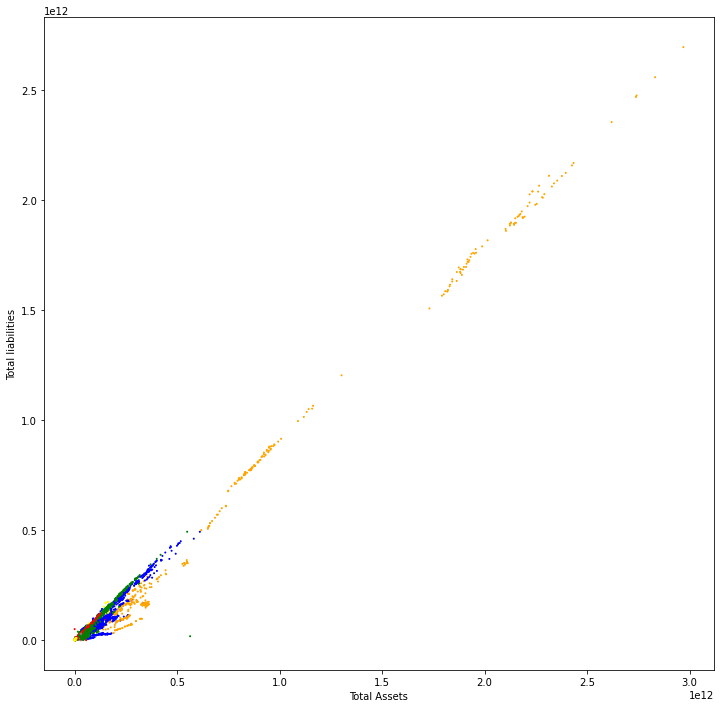

In [145]:
plt.figure(figsize=(10,25));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue",'yellow','orange','gray']
combo_df['color'] = combo_df['cluster'].map(lambda p: colors[p])

ax = combo_df.plot(    
    kind="scatter", 
    x="Total Assets", y="Total liabilities",
    figsize=(12,12),
    c = combo_df['color'], s=1
)

#plt.xlim(0,5E11)
#plt.ylim(0,5E11)


# centroids.plot(
#     kind="scatter", 
#     x="Gross Profit", y="Net Income Common", 
#     marker="*", c=["red", "green", "blue",'yellow','orange','black'], s=1000,
#     ax=ax
# )

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [148]:
# how close can I 'predict' revenues?

X = combo_df.drop(columns=['Revenue','color'])
y = combo_df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [149]:
rf = RandomForestRegressor()

rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [150]:
print(f"Training score: {rf.score(X_train_sc,y_train)}")
print(f"Testing score: {rf.score(X_test_sc,y_test)}")

Training score: 0.9985566025667909
Testing score: 0.9909029710569122


In [153]:
y_preds = rf.predict(X_test_sc)

In [152]:
from sklearn.metrics import mean_squared_error

print(f"RMSE of {round(np.sqrt(mean_squared_error(y_test,rf.predict(X_test_sc)))/1000000000, 2)} billion")

RMSE of 1.86 billion


In [171]:
pred_df = pd.DataFrame([y_preds,y_test]).T
pred_df

0             1
0      1.263602e+09  1.253730e+09
1      6.216055e+10  6.501700e+10
2      9.959257e+08  5.577370e+08
3      2.279080e+08  1.959090e+08
4      1.799427e+09  1.823090e+09
...             ...           ...
26101  2.406877e+07  1.337770e+07
26102  6.144359e+07  1.976630e+08
26103  1.070157e+08  1.043880e+08
26104  7.256969e+07  6.413380e+07
26105  4.730443e+09  4.603541e+09

[26106 rows x 2 columns]

-inf

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

### (unless it's on purpose, of course)

In [ ]:
#code to pull data in bulk
def bulk_stockrow_puller():
    ticker_list = stock_list['Ticker']
    bad_list = []

    for ticker in ticker_list:
        try:
            url_inc=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
            response_inc = requests.get(url_inc)
            with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
                f.write(response_inc.content)

            url_bal=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'    
            response_bal = requests.get(url_bal)
            with open(os.path.join("BalanceSheet", f"{ticker}_bal.xlsx"), 'wb') as f:
                f.write(response_bal.content)

            url_cfl=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Cash%20Flow&sort=desc'
            response_cfl = requests.get(url_cfl)
            with open(os.path.join("CashFlow", f"{ticker}_cashflow.xlsx"), 'wb') as f:
                f.write(response_cfl.content)
            time.sleep(0.25)
        except:
            print(f"{ticker} is bad")
            bad_list.append(ticker)

In [ ]:
bulk_stockrow_puller()